In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
df.head()

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91


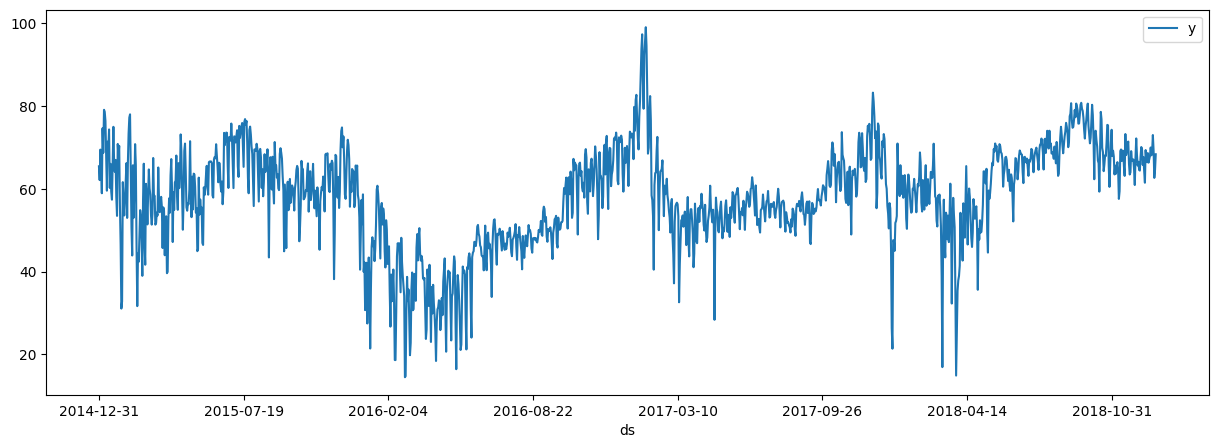

In [3]:
plt = df.plot(x = "ds", y = "y", figsize = (15, 5))

In [4]:
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

In [5]:
model = NeuralProphet()
model.set_plotting_backend("plotly-static")

In [6]:
model.fit(df)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,139.022903,153.077698,1.666211,0.0,0
1,96.113029,109.359818,1.098051,0.0,1
2,52.106300,62.174736,0.523870,0.0,2
3,20.846840,26.693605,0.145892,0.0,3
4,14.865705,20.437763,0.087849,0.0,4
...,...,...,...,...,...
95,4.494214,6.124143,0.012400,0.0,95
96,4.486435,6.100306,0.012416,0.0,96
97,4.489209,6.088096,0.012440,0.0,97
98,4.496238,6.121126,0.012427,0.0,98


In [8]:
future = model.make_future_dataframe(df, n_historic_predictions=True, periods=365)

WARNING - (py.warnings._showwarnmsg) - C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\neuralprophet\data\split.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, future_df])



In [9]:
forecast = model.predict(future)

Predicting: 46it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



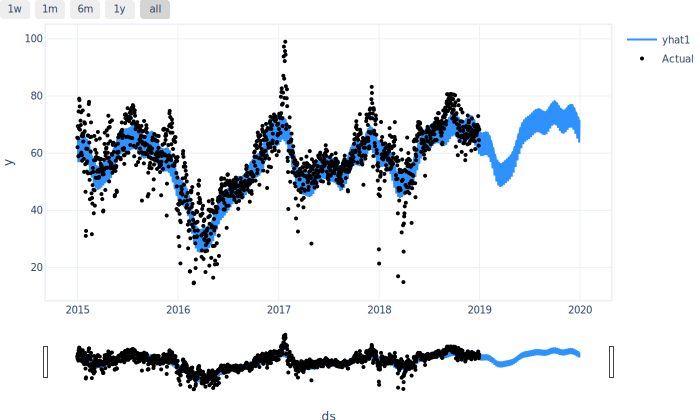

In [10]:
model.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\neuralprophet\plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\neuralprophet\plot_model_parameters_plotly.py:271: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\neuralprophet\plot_model_parameters_plotly.py:475: FutureWarning:

The behavior of DatetimeProperties.to_py

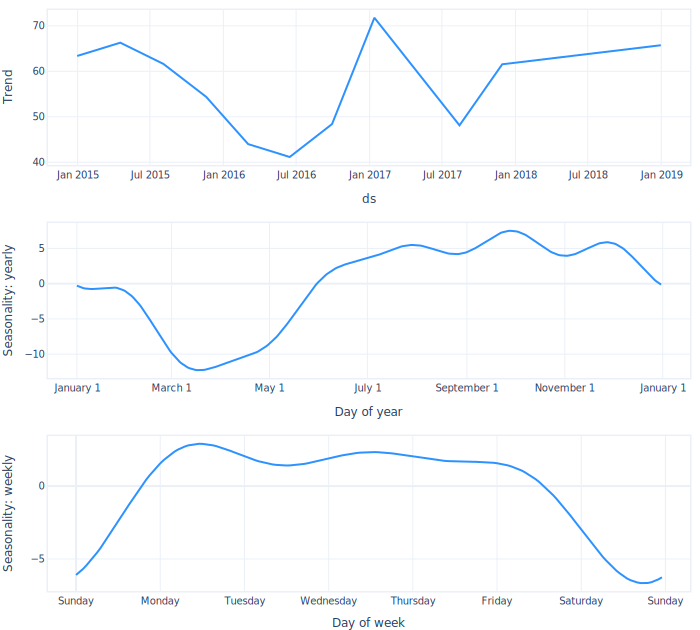

In [11]:
model.plot_parameters(components=["trend", "seasonality"])